In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_excel('/home/riddhirup/Downloads/Forecasting-Sales-of-a-Store-using-LSTM-main/dataset/Sales_Forecasting.xlsx')

In [3]:
dataset.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,NaN,Bombay (Mumbai),1,1,2005,72.2
1,Asia,India,NaN,Bombay (Mumbai),1,2,2005,72.7
2,Asia,India,NaN,Bombay (Mumbai),1,3,2005,74.3
3,Asia,India,NaN,Bombay (Mumbai),1,4,2005,78.9
4,Asia,India,NaN,Bombay (Mumbai),1,5,2005,81.5


In [4]:
dataset.describe()

,State_of_outlet,Month,Day,Year,Total_Sales
count,0.0,17536.000000,17536.000000,17536.000000,17536.000000
mean,NaN,6.524179,15.732892,2010.502053,80.117963
std,NaN,3.449400,8.801978,3.452525,13.315486
min,NaN,1.000000,1.000000,2005.000000,-99.000000
25%,NaN,4.000000,8.000000,2008.000000,77.500000
50%,NaN,7.000000,16.000000,2011.000000,82.600000
75%,NaN,10.000000,23.000000,2014.000000,86.100000
max,NaN,12.000000,31.000000,2016.000000,102.500000


In [5]:
from datetime import datetime
dataset['Date'] = dataset.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", '%Y-%m-%d'), axis=1)

In [6]:
print(dataset['Date'].min(),dataset['Date'].max())

2005-01-01 00:00:00 2016-12-31 00:00:00


# Data preprocessing

In [7]:
dataset

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales,Date
0,Asia,India,NaN,Bombay (Mumbai),1,1,2005,72.2,2005-01-01
1,Asia,India,NaN,Bombay (Mumbai),1,2,2005,72.7,2005-01-02
2,Asia,India,NaN,Bombay (Mumbai),1,3,2005,74.3,2005-01-03
3,Asia,India,NaN,Bombay (Mumbai),1,4,2005,78.9,2005-01-04
4,Asia,India,NaN,Bombay (Mumbai),1,5,2005,81.5,2005-01-05
...,...,...,...,...,...,...,...,...,...
17531,Asia,India,NaN,Delhi,12,27,2016,61.3,2016-12-27
17532,Asia,India,NaN,Delhi,12,28,2016,61.7,2016-12-28
17533,Asia,India,NaN,Delhi,12,29,2016,59.3,2016-12-29
17534,Asia,India,NaN,Delhi,12,30,2016,57.1,2016-12-30


In [8]:
dataset.drop(['HQ','Country','State_of_outlet','City_of_outlet','Month','Day','Year'],axis=1,inplace=True)

In [9]:
dataset.head()

,Total_Sales,Date
0,72.2,2005-01-01
1,72.7,2005-01-02
2,74.3,2005-01-03
3,78.9,2005-01-04
4,81.5,2005-01-05


In [10]:
dataset.sort_values('Date')

,Total_Sales,Date
0,72.2,2005-01-01
730,75.8,2005-01-01
1095,61.0,2005-01-01
365,66.5,2005-01-01
1,72.7,2005-01-02
...,...,...
16802,67.4,2016-12-30
17169,76.8,2016-12-31
16437,79.7,2016-12-31
16803,67.1,2016-12-31


In [11]:
dataset.nunique()

Total_Sales     539
Date           4383
dtype: int64

In [12]:
dataset.isnull().any()

Total_Sales    False
Date           False
dtype: bool

In [13]:
dataset = dataset.groupby('Date')['Total_Sales'].sum().reset_index()

In [14]:
dataset.head()

,Date,Total_Sales
0,2005-01-01,275.5
1,2005-01-02,275.5
2,2005-01-03,278.6
3,2005-01-04,279.3
4,2005-01-05,281.4


In [15]:
Sales = dataset.set_index('Date')

In [16]:
Sales.head()

,Total_Sales
Date,
2005-01-01,275.5
2005-01-02,275.5
2005-01-03,278.6
2005-01-04,279.3
2005-01-05,281.4


In [17]:
Sales_copy = Sales

In [18]:
Sales.shape

(4383, 1)

# Data Visualization

In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales')

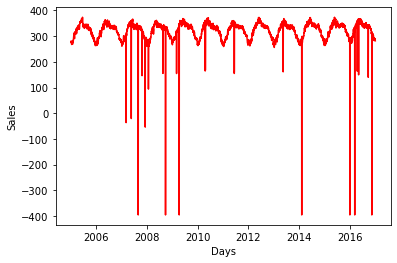

In [20]:
plt.plot(Sales,color="red")
plt.xlabel('Days')
plt.ylabel('Sales')

<AxesSubplot:xlabel='Date'>

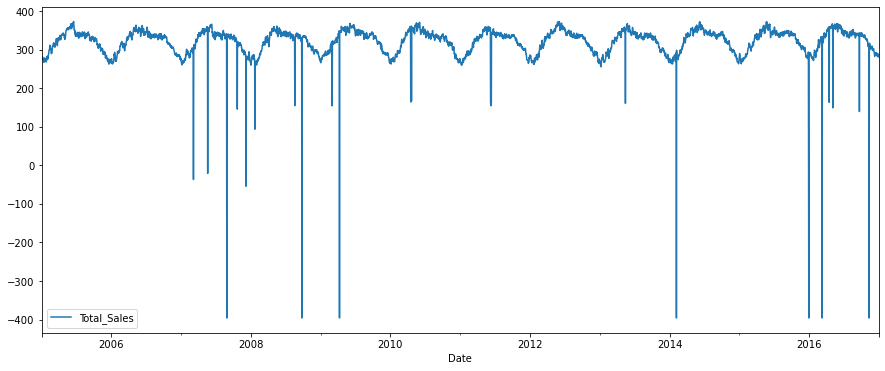

In [21]:
Sales.plot(figsize=(15,6))

In [22]:
import tensorflow as tf


In [23]:
import keras

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
sc=MinMaxScaler(feature_range=(0,1))
Sales=sc.fit_transform(np.array(Sales).reshape(-1,1))

In [26]:
Sales.shape

(4383, 1)

In [27]:
Sales

array([[0.87264457],
       [0.87264457],
       [0.87667316],
       ...,
       [0.88070175],
       [0.88109162],
       [0.88096166]])

In [28]:
train_length = int(len(Sales)*0.7)
test_length = len(Sales)-train_length

In [29]:
print(train_length,test_length)

3068 1315


In [30]:
train_set = Sales[:train_length,:]
test_set = Sales[train_length:,:1]

In [31]:
train_set.shape

(3068, 1)

In [32]:
train_set

array([[0.87264457],
       [0.87264457],
       [0.87667316],
       ...,
       [0.98843405],
       [0.99311241],
       [0.98843405]])

In [33]:
time=10
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [34]:
time_step = 10
X_train, y_train = create_dataset(train_set, time)
X_test, ytest = create_dataset(test_set, time)

In [35]:
print(X_train.shape), print(y_train.shape)


(3057, 10)
(3057,)


(None, None)

In [36]:
print(X_test.shape), print(ytest.shape)

(1304, 10)
(1304,)


(None, None)

In [37]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(75,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 75)            37800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                25200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 73,451
Trainable params: 73,451
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
48/48 [==============================] - 14s 107ms/step - loss: 0.1227 - val_loss: 0.0101
Epoch 2/200
48/48 [==============================] - 2s 35ms/step - loss: 0.0093 - val_loss: 0.0069
Epoch 3/200
48/48 [==============================] - 2s 36ms/step - loss: 0.0079 - val_loss: 0.0108
Epoch 4/200
48/48 [==============================] - 2s 34ms/step - loss: 0.0055 - val_loss: 0.0072
Epoch 5/200
48/48 [==============================] - 2s 35ms/step - loss: 0.0052 - val_loss: 0.0067
Epoch 6/200
48/48 [==============================] - 2s 34ms/step - loss: 0.0045 - val_loss: 0.0057
Epoch 7/200
48/48 [==============================] - 2s 34ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 8/200
48/48 [==============================] - 2s 34ms/step - loss: 0.0030 - val_loss: 0.0048
Epoch 9/200
48/48 [==============================] - 2s 34ms/step - loss: 0.0033 - val_loss: 0.0098
Epoch 10/200
48/48 [==============================] - 2s 34ms/step - loss: 0.0038 - val_loss: 0.00

48/48 [==============================] - 2s 33ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 163/200
48/48 [==============================] - 2s 34ms/step - loss: 8.8635e-04 - val_loss: 0.0036
Epoch 164/200
48/48 [==============================] - 2s 34ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 165/200
48/48 [==============================] - 2s 36ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 166/200
48/48 [==============================] - 2s 39ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 167/200
48/48 [==============================] - 2s 34ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 168/200
48/48 [==============================] - 2s 32ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 169/200
48/48 [==============================] - 2s 33ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 170/200
48/48 [==============================] - 2s 35ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 171/200
48/48 [==============================] - 2s 37ms/step - loss: 0.0023 - val_los

In [42]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)
train_pred=sc.inverse_transform(train_pred)
test_pred=sc.inverse_transform(test_pred)

In [43]:
ypred = model.predict(X_test,batch_size=1)

In [44]:
ytest[0:6]

array([0.96920078, 0.96556205, 0.96842105, 0.97063028, 0.96556205,
       0.9597141 ])

In [45]:
ypred[0:6]

array([[0.96184677],
       [0.95709896],
       [0.953573  ],
       [0.9513759 ],
       [0.95182276],
       [0.9509538 ]], dtype=float32)

In [46]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

316.73527277126885

In [47]:
math.sqrt(mean_squared_error(ytest,test_pred))

319.6223405621397

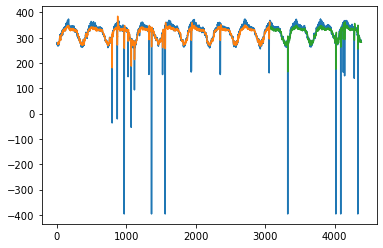

In [48]:
look_back=10
Train_Predict_Plot = np.empty_like(Sales)
Train_Predict_Plot[:, :] = np.nan
Train_Predict_Plot[look_back:len(train_pred)+look_back, :] = train_pred
Test_Predict_Plot = np.empty_like(Sales)
Test_Predict_Plot[:, :] = np.nan
Test_Predict_Plot[len(train_pred)+(look_back*2)+1:len(Sales)-1, :] = test_pred
plt.plot(sc.inverse_transform(Sales))
plt.plot(Train_Predict_Plot)
plt.plot(Test_Predict_Plot)
plt.show()

In [49]:
model.save("Sales_Prediction_Forecast.h5")

In [50]:
import joblib
joblib.dump(sc,"scaler")

['scaler']